In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('e:/data/brain_stroke.csv')

In [75]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [76]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Question 1: Is smoking cause brain stroke?

In [77]:
smokers_cases = df.groupby('smoking_status')[['stroke']].sum().sort_values(by='stroke')
smokers_cases

,stroke
smoking_status,
smokes,42
Unknown,47
formerly smoked,70
never smoked,89


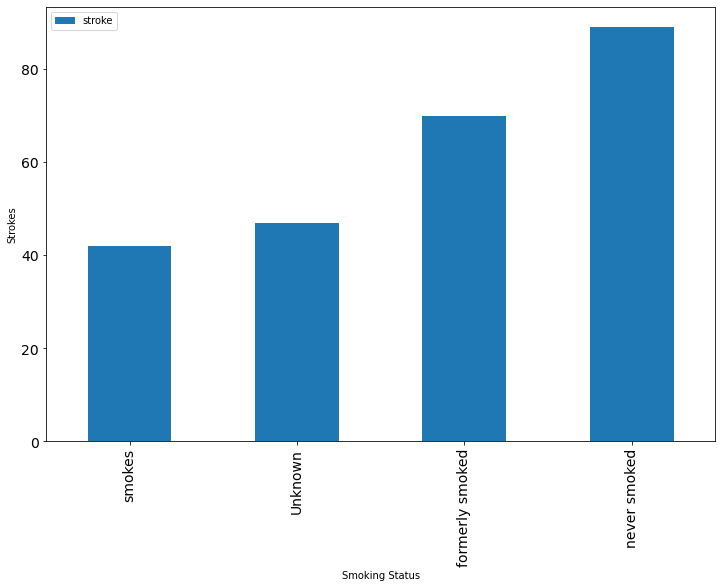

In [78]:
smokers_cases.plot(kind='bar', figsize=(12, 8), xlabel='Smoking Status', ylabel='Strokes', fontsize=14);

Answer: Most of people who got brain stroke never smoked, so smoking status don't affect on it.

Question 2: What is average, min and max age of people who got brain stroke?

In [79]:
ages_cases = df.loc[df.stroke == 1]['age'].describe()[['mean', 'min', 'max']]
ages_cases

mean    67.819839
min      1.320000
max     82.000000
Name: age, dtype: float64

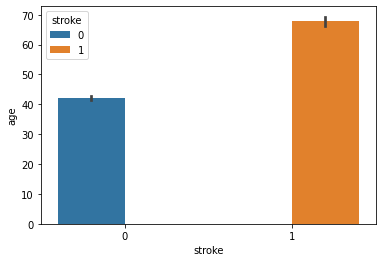

In [87]:
sns.barplot(x='stroke', y='age', hue='stroke', data=df);

Answer: Average age of people who got brain stroke is 67.8, min age its 1.3 and max is 82 years old.

Question 3: Which Residence causes more brain strokes? Сoefficient.

In [ ]:
residences_cases = df.groupby('Residence_type')[['stroke']].mean()
residences_cases

,stroke
Residence_type,
Rural,0.046141
Urban,0.053318


Answer: Coefficient of brain stroke cases bigger in Urban residence.

Question 4: Is glucose level affect brain stroke?

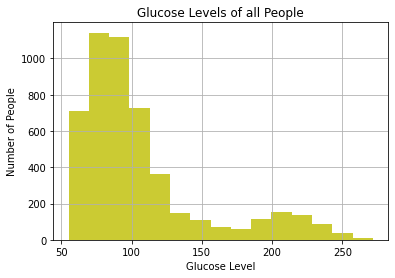

In [ ]:
plt.hist(df['avg_glucose_level'], bins=15, facecolor='y', alpha=0.8)
plt.title('Glucose Levels of all People')
plt.grid(True)
plt.ylabel('Number of People')
plt.xlabel('Glucose Level')
plt.show()

In [ ]:
high_glucose_level_cases = df.loc[df['avg_glucose_level'] > 100 ]['stroke'].sum()
low_glucose_level_cases = df.loc[df['avg_glucose_level'] < 100 ]['stroke'].sum()
high_glucose_level_cases, low_glucose_level_cases

(136, 112)

In [ ]:
high_glucose_level_cases > low_glucose_level_cases

True

Answer: People with high glucose level got brain stroke more often, so it affect on disease.

Question 5: People with which work type got more brain stroke cases?

In [ ]:
work_types_cases = df.groupby('work_type')[['stroke']].sum()

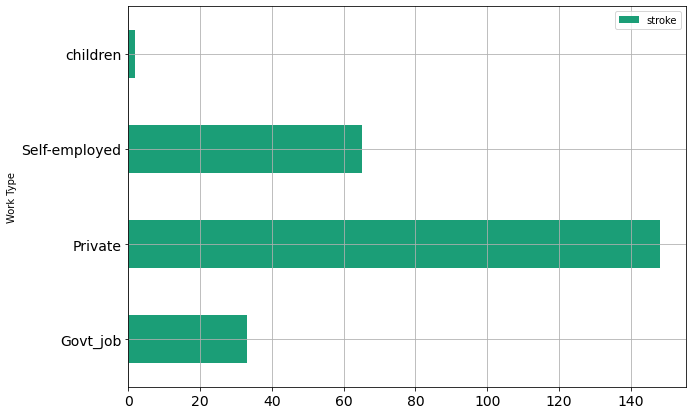

In [ ]:
work_types_cases.plot(kind='barh', xlabel='Work Type', colormap='Dark2', figsize=(10, 7), fontsize=14, grid=True);

Answer: People with Private work type got more disease cases.